In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import statsmodels
import itertools
import openpyxl
import plotly_express as px

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [181]:
import imblearn
from imblearn.pipeline import Pipeline

In [45]:
import seaborn as sns
from treeinterpreter import treeinterpreter as ti

C:\Users\ddunn.CUREXCURRENCY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [180]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [235]:
from imblearn.over_sampling import BorderlineSMOTE

In [198]:
from collections import Counter

In [6]:
pd.set_option('display.max_columns', 500)

In [7]:
df = pd.read_csv('denis_set.csv')

In [178]:
all_df.groupby('MISSED').count()

,AGGRESSIVE,BUY,time_difference,z_USDEquivalentAmount,z_Denis_activation_spread,price_vs_placement_bid,price_vs_placement_ask,price_vs_activation_bid,price_vs_activation_ask,pre_placement_vs_received_time_diff,price_vs_pre_placement_book_join_price,z_PlacementSpread
MISSED,,,,,,,,,,,,
0,559022,559022,559022,559022,559022,559022,559022,559022,559022,559022,559022,559022
1,530672,530672,530672,530672,530672,530672,530672,530672,530672,530672,530672,530672


In [26]:
aggressive_dummy = pd.get_dummies(df['AggressivePassive'])

In [27]:
symbol_dummy = pd.get_dummies(df['Symbol'])

In [28]:
buy_sell_dummy = pd.get_dummies(df['BuySell'])

In [29]:
miss_fill = pd.get_dummies(df['MissFill'])

In [30]:
tf = [miss_fill,aggressive_dummy,buy_sell_dummy,df]

In [31]:
all_df = pd.concat(tf,join = 'outer',axis =1)

In [32]:
all_df.head()

,FILLED,MISSED,AGGRESSIVE,PASSIVE,BUY,SELL,Unnamed: 0,MissFill,AggressivePassive,Symbol,OrderId,BuySell,time_difference,z_USDEquivalentAmount,z_Denis_activation_spread,z_PlacementSpread,price_vs_placement_bid,price_vs_placement_ask,price_vs_activation_bid,price_vs_activation_ask,pre_placement_vs_received_time_diff,price_vs_pre_placement_book_join_price
0,1,0,1,0,1,0,0,FILLED,AGGRESSIVE,EURUSD,2011060000252000045,BUY,1.799072,0.069742,0.092202,0.092202,0.00002,0.00000,0.00002,-0.00002,3.0,0.00002
1,1,0,1,0,1,0,1,FILLED,AGGRESSIVE,EURNOK,2011060000252000044,BUY,8.281982,-0.190845,0.861276,0.861276,0.00369,0.00000,0.00369,-0.00072,16.0,0.00369
2,0,1,0,1,0,1,4,MISSED,PASSIVE,EURCNH,2011060000252000041,SELL,2.935059,-0.467884,0.432241,0.432241,-0.00006,-0.00097,0.00039,-0.00181,41.0,-0.00097
3,1,0,1,0,0,1,5,FILLED,AGGRESSIVE,EURCNH,2011060000252000040,SELL,2.708984,-0.710241,0.432241,0.432241,0.00000,-0.00091,0.00045,-0.00175,41.0,-0.00091
4,1,0,1,0,0,1,8,FILLED,AGGRESSIVE,EURCNH,2011060000252000037,SELL,3.613770,-0.710241,0.217442,0.217442,-0.00029,-0.00104,0.00009,-0.00161,51.0,-0.00104


In [33]:
all_df = all_df[['MISSED','AGGRESSIVE','BUY','time_difference','z_USDEquivalentAmount','z_Denis_activation_spread','price_vs_placement_bid','price_vs_placement_ask','price_vs_activation_bid','price_vs_activation_ask','pre_placement_vs_received_time_diff','price_vs_pre_placement_book_join_price','z_PlacementSpread']]



In [188]:
all_df = all_df.dropna()

In [189]:
all_df = all_df.reset_index(drop=True)

In [222]:
X = X.reset_index(drop=True)

In [186]:
X = X.dropna()

In [36]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089694 entries, 0 to 1089693
Data columns (total 13 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   MISSED                                  1089694 non-null  uint8  
 1   AGGRESSIVE                              1089694 non-null  uint8  
 2   BUY                                     1089694 non-null  uint8  
 3   time_difference                         1089694 non-null  float64
 4   z_USDEquivalentAmount                   1089694 non-null  float64
 5   z_Denis_activation_spread               1089694 non-null  float64
 6   price_vs_placement_bid                  1089694 non-null  float64
 7   price_vs_placement_ask                  1089694 non-null  float64
 8   price_vs_activation_bid                 1089694 non-null  float64
 9   price_vs_activation_ask                 1089694 non-null  float64
 10  pre_placement_vs_received_time

In [221]:
X = all_df[['AGGRESSIVE','BUY','time_difference','z_USDEquivalentAmount','price_vs_placement_bid','price_vs_placement_ask','pre_placement_vs_received_time_diff','price_vs_pre_placement_book_join_price','z_PlacementSpread']]


In [248]:
df_columns = all_df[['AGGRESSIVE','BUY','time_difference','z_USDEquivalentAmount','price_vs_placement_bid','price_vs_placement_ask','pre_placement_vs_received_time_diff','price_vs_pre_placement_book_join_price','z_PlacementSpread']]


In [192]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089694 entries, 0 to 1089693
Data columns (total 9 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   AGGRESSIVE                              1089694 non-null  uint8  
 1   BUY                                     1089694 non-null  uint8  
 2   time_difference                         1089694 non-null  float64
 3   z_USDEquivalentAmount                   1089694 non-null  float64
 4   price_vs_placement_bid                  1089694 non-null  float64
 5   price_vs_placement_ask                  1089694 non-null  float64
 6   pre_placement_vs_received_time_diff     1089694 non-null  float64
 7   price_vs_pre_placement_book_join_price  1089694 non-null  float64
 8   z_PlacementSpread                       1089694 non-null  float64
dtypes: float64(7), uint8(2)
memory usage: 60.3 MB


In [223]:
y = all_df['MISSED']

In [236]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 559022, 1: 530672})


In [225]:
530672/559022

0.9492864323765433

In [233]:
over = SMOTE(sampling_strategy=0.01)
under = RandomUnderSampler(sampling_strategy=0.05)

In [234]:
#steps = [('o', over), ('u', under)]
steps = ['u',under]
pipeline = Pipeline(steps=steps)

TypeError: 'RandomUnderSampler' object is not iterable

In [237]:
# transform the dataset
#oversample = SMOTE()
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

In [232]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [238]:
scaler =MinMaxScaler()
X = scaler.fit_transform(X)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [240]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [241]:
clf.score(X_test,y_test)

0.8989628315164698

In [114]:
from sklearn import metrics

In [216]:
y_pred = clf.predict(X_test)

In [217]:
metrics.accuracy_score(y_test,y_pred)

0.899503060702441

In [152]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

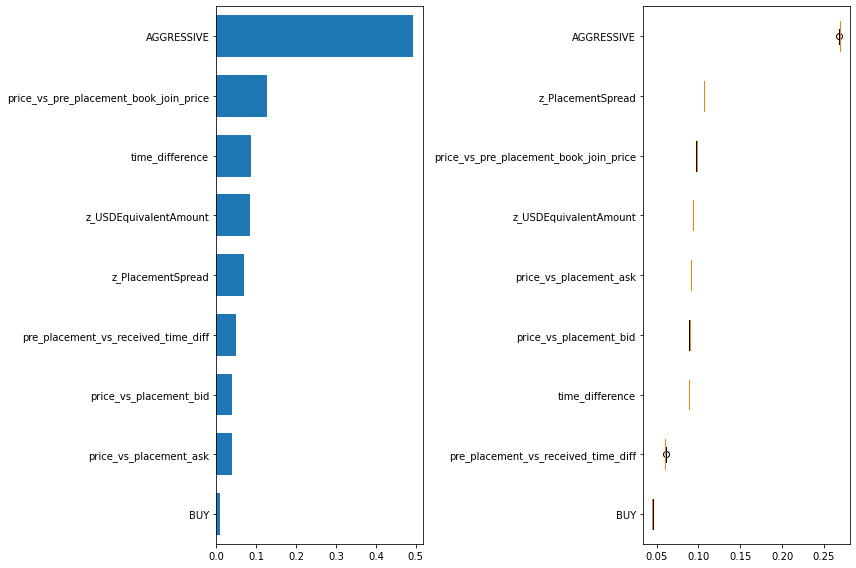

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(df_columns.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df_columns.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [159]:
instances = X_test[0]

In [160]:
prediction, bias, contributions = ti.predict(clf, instances.reshape(1,-1))

In [161]:
contributions

array([[[-0.35733159,  0.35733159],
        [ 0.00170546, -0.00170546],
        [-0.08512065,  0.08512065],
        [-0.04751937,  0.04751937],
        [-0.04719548,  0.04719548],
        [ 0.00420395, -0.00420395],
        [-0.00914089,  0.00914089],
        [ 0.06984605, -0.06984605],
        [-0.03818032,  0.03818032]]])

In [162]:
for i in range(len(instances)):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df_columns.columns), key=lambda x: not abs(x[0]).all()):
        print(feature)
    print("-"*20)

Instance 0
Bias (trainset mean) [0.5127423 0.4872577]
Feature contributions:
AGGRESSIVE
BUY
time_difference
z_USDEquivalentAmount
price_vs_placement_bid
price_vs_placement_ask
pre_placement_vs_received_time_diff
price_vs_pre_placement_book_join_price
z_PlacementSpread
--------------------
Instance 1


IndexError: index 1 is out of bounds for axis 0 with size 1

In [164]:
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print ("Feature contributions:")
#zipped = zip(contributions[0],df_columns.columns)
#zipped = zip(df_columns.columns,contributions[0])
for c, feature in zip(contributions[0],df_columns.columns):
#for feature, c in sorted(zipped, key=lambda x: x[1]):    
    print(feature, c)
#sorted(zipped, key=lambda x: x[0])

Prediction [[0.00400947 0.99599053]]
Bias (trainset prior) [[0.5127423 0.4872577]]
Feature contributions:
AGGRESSIVE [-0.35733159  0.35733159]
BUY [ 0.00170546 -0.00170546]
time_difference [-0.08512065  0.08512065]
z_USDEquivalentAmount [-0.04751937  0.04751937]
price_vs_placement_bid [-0.04719548  0.04719548]
price_vs_placement_ask [ 0.00420395 -0.00420395]
pre_placement_vs_received_time_diff [-0.00914089  0.00914089]
price_vs_pre_placement_book_join_price [ 0.06984605 -0.06984605]
z_PlacementSpread [-0.03818032  0.03818032]


In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
def Calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [101]:
t = all_df.iloc[:,:-1]
Calc_vif(t)

,variables,VIF
0,MISSED,1.556689
1,AGGRESSIVE,1.544725
2,BUY,1.831255
3,time_difference,1.395431
4,z_USDEquivalentAmount,1.005064
5,z_Denis_activation_spread,1.048692
6,price_vs_placement_bid,247.356380
7,price_vs_placement_ask,493.492049
8,price_vs_activation_bid,308.326248
9,price_vs_activation_ask,532.118617


In [107]:
t = all_df.drop(['price_vs_activation_bid','price_vs_activation_ask','z_Denis_activation_spread','price_vs_placement_bid'],axis = 1)


In [108]:
Calc_vif(t)

,variables,VIF
0,MISSED,1.555209
1,AGGRESSIVE,1.528596
2,BUY,1.829213
3,time_difference,1.395051
4,z_USDEquivalentAmount,1.004872
5,price_vs_placement_ask,1.002039
6,pre_placement_vs_received_time_diff,1.000627
7,price_vs_pre_placement_book_join_price,1.057456
8,z_PlacementSpread,1.027056


In [ ]:
print(np.mean(cross_val_score(clf, X, y, cv=10)))


In [ ]:
importances = .feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X, y)

In [126]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 0 (0.678379)
2. feature 1 (0.252302)
3. feature 7 (0.045000)
4. feature 8 (0.009796)
5. feature 4 (0.006044)
6. feature 6 (0.004824)
7. feature 3 (0.002443)
8. feature 5 (0.000906)
9. feature 2 (0.000307)


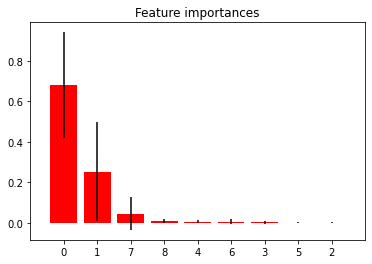

In [127]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [130]:
import xgboost as xgb

In [ ]:
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, train, num_round)

In [242]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
y_pred = xgb_model.predict(X_test)

In [244]:
metrics.accuracy_score(y_test,y_pred)

0.9080930625270561

In [174]:
metrics.confusion_matrix(y_test,y_pred)

array([[119417,  20545],
       [  4900, 127562]], dtype=int64)

In [261]:
from sklearn.tree import export_graphviz

In [272]:
import graphviz
from sklearn import tree

In [246]:
estimator = clf.estimators_[5]

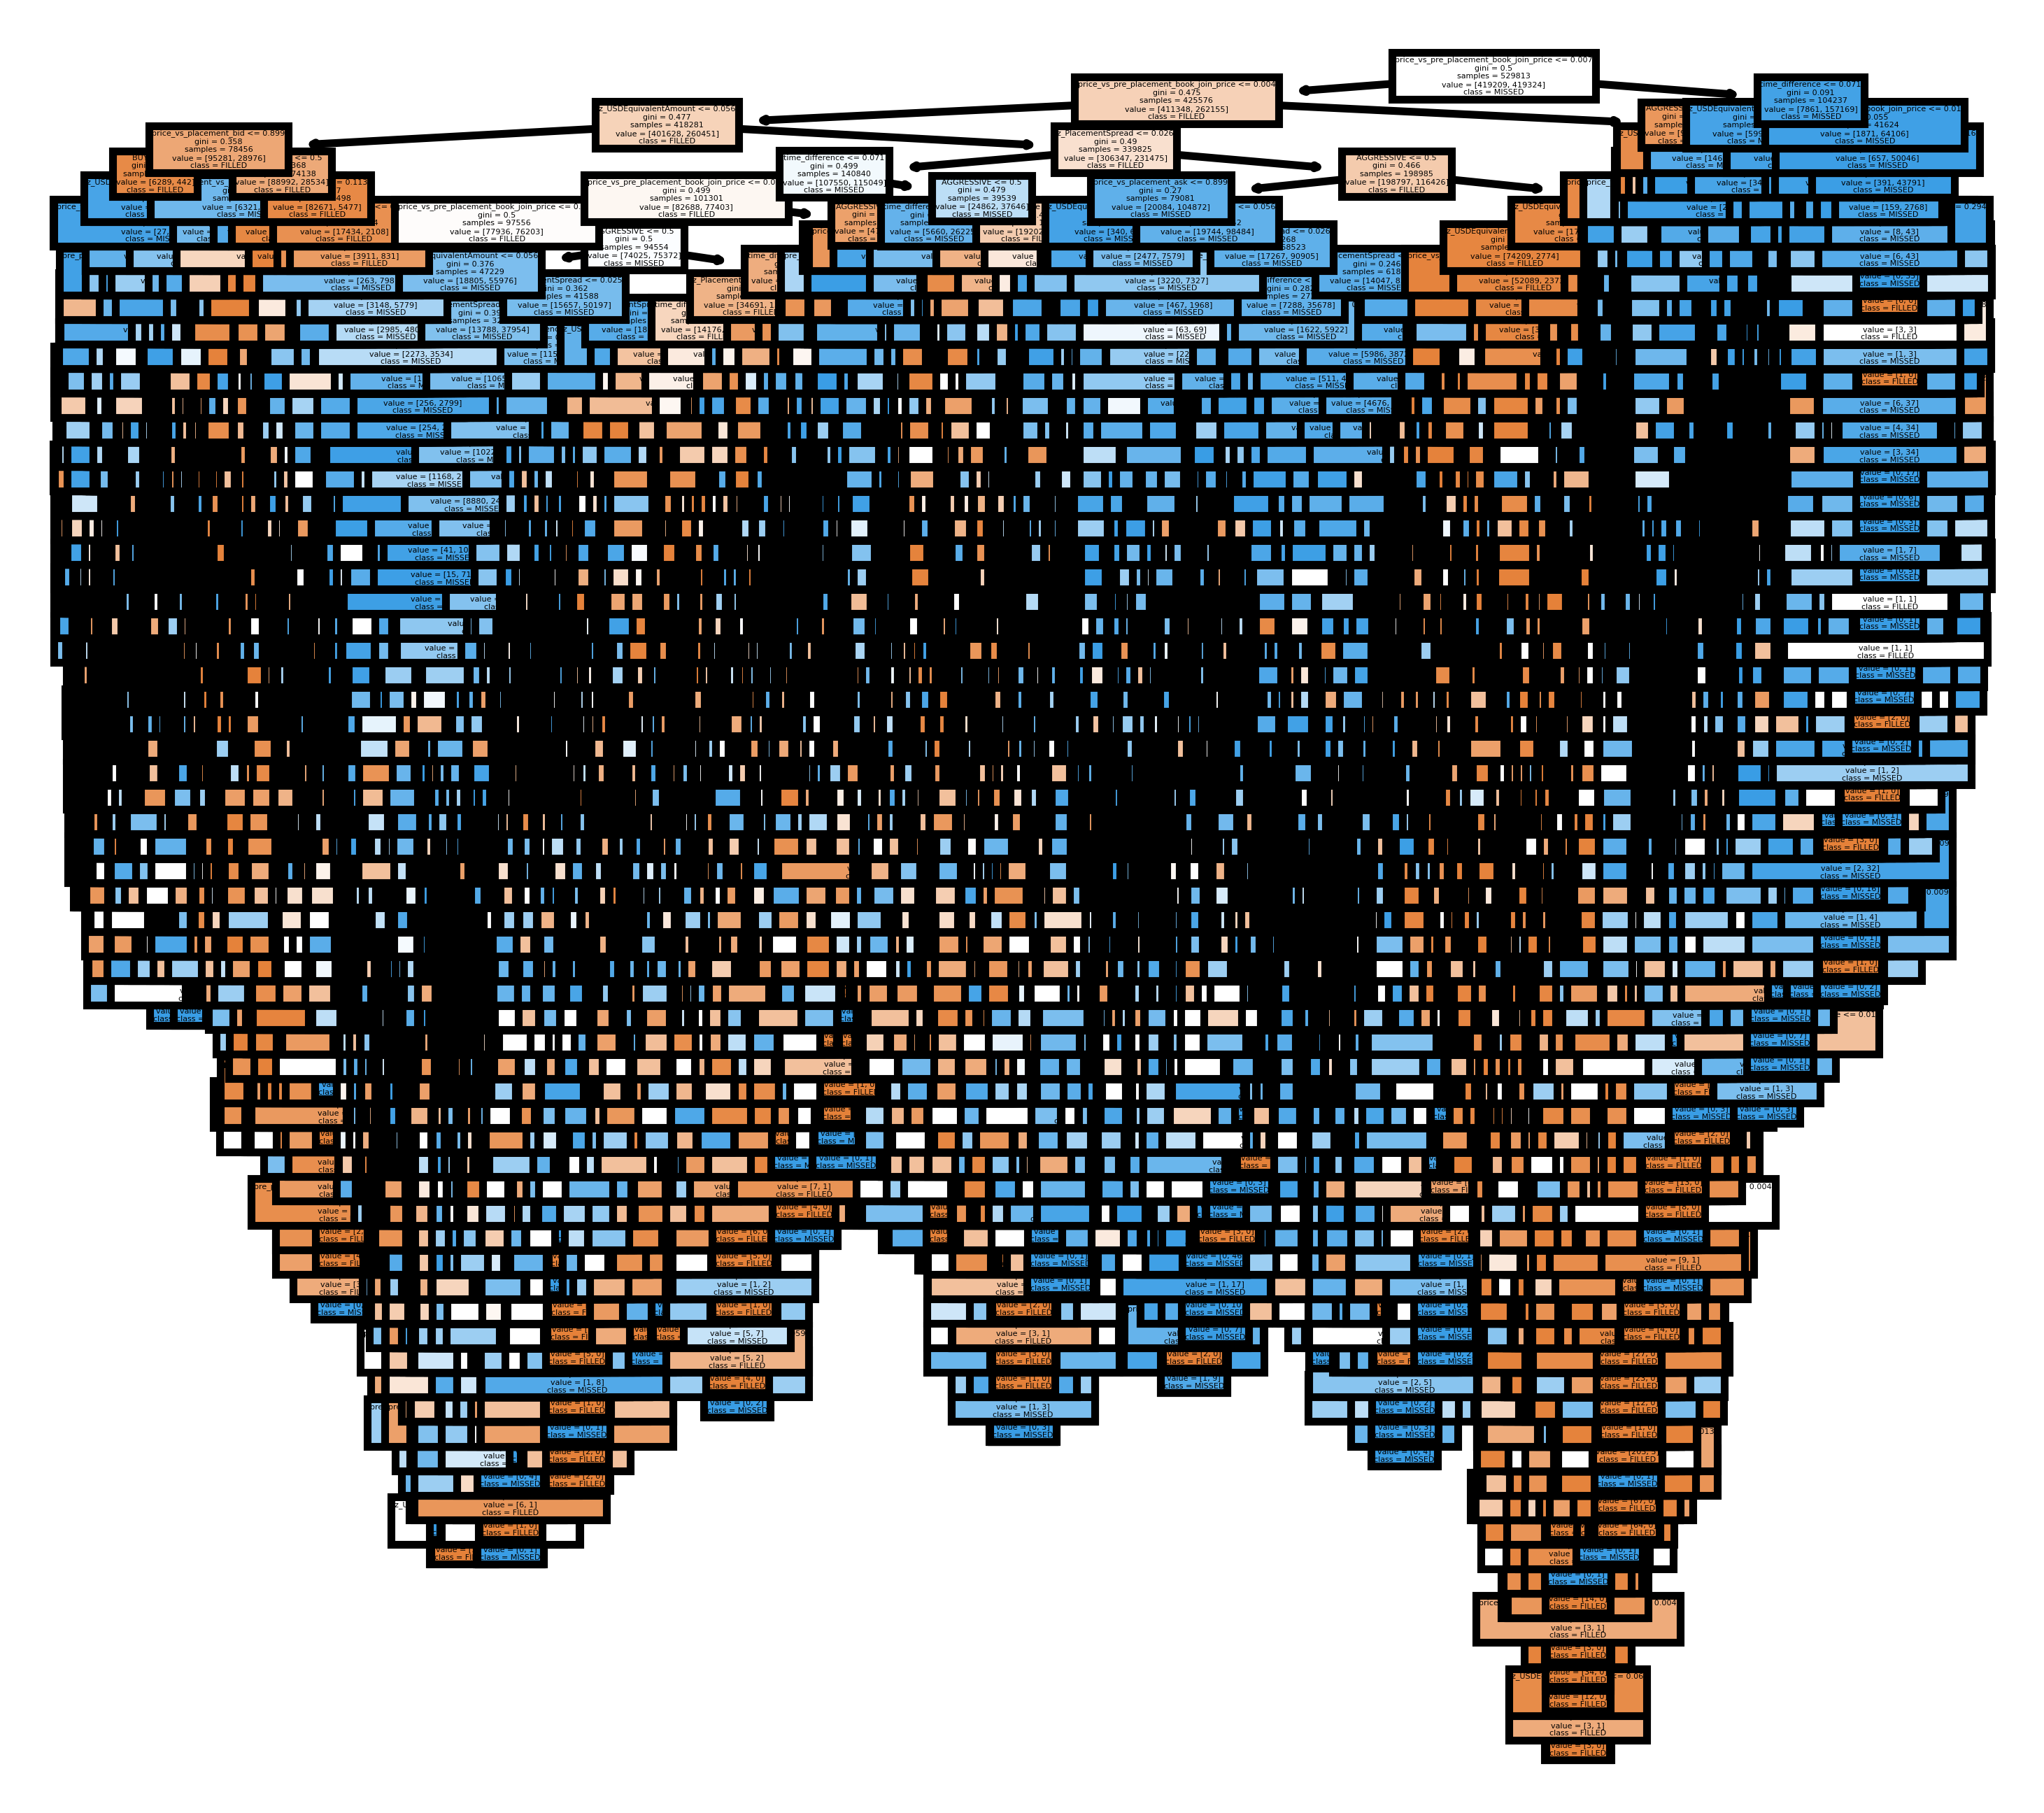

In [274]:
fn=df_columns.columns
cn=classed
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [267]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_columns.columns,
                class_names = classed,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [268]:
from graphviz import Source
Source.from_file('tree.dot')

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [269]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [254]:
classed = {0 : 'FILLED',1 :'MISSED'}

In [ ]:
corrmat = all_df.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.columns
cm = np.corrcoef(all_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgf = LogisticRegression().fit(X,y)

In [ ]:
print(np.mean(cross_val_score(lgf, X, y, cv=10)))

In [ ]:
lgf.coef_

In [ ]:
lg_importances = lgf.coef_
lg_std = np.std([tree.lg_importances.coef_ for tree in lg_importances.coef_],
             axis=0)
indices = np.argsort(lg_importances)[::-1]

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge

In [ ]:
from treeinterpreter import treeinterpreter as ti

In [ ]:
clf.predict(X.iloc[4])

In [ ]:
test = X[4:10].reshape(-1,1)

In [ ]:
test


In [ ]:
X[4].shape

In [ ]:
clf.predict(test)

In [ ]:
prediction, bias, contributions = ti.predict(clf,test)

In [ ]:
contributions

In [ ]:
assert(np.allclose(prediction,bias + np.sum(contributions,axis = 1)))

In [ ]:
assert(np.allclose(clf.predict(X),bias + np.sum(contributions,axis = 1)))

In [ ]:
contributions

In [57]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'